# Analysis of Agricultural Product imports in Europe from 2000 to 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOADING DATA

In [2]:
df_import = pd.read_csv('C:/Users/Desktop/Desktop/VisualStudioCode/FAO_Analysis/Data/FAOSTAT_Import.csv', encoding='utf-8')
df_export = pd.read_csv('C:/Users/Desktop/Desktop/VisualStudioCode/FAO_Analysis/Data/FAOSTAT_Export.csv', encoding='utf-8')

CHANGE IN AGRICULTURAL PRODUCT IMPORT VALUES OVER 22 YEARS IN EUROPE

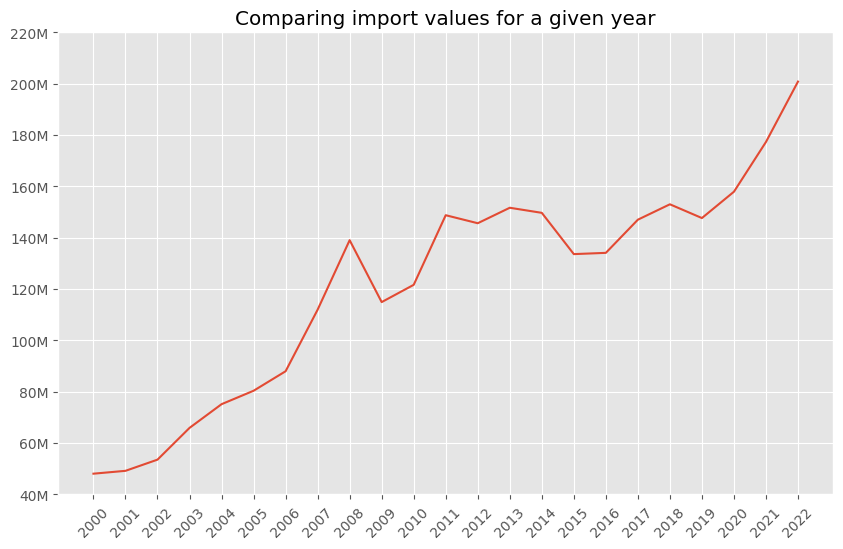

In [11]:
years = []
sum_array = []
    
    
for index, row in df_import.drop_duplicates(subset=['Year']).iterrows():
    year = int(row['Year'])
    years.append(year)
    
years = sorted(years)
   
for year in years:  
    sum_value = round(df_import[df_import['Year'] == year]['Value'].sum(), 2)
    sum_array.append(sum_value)
       
    
plt.figure(figsize=(10,6))
plt.plot(years, sum_array)
plt.xticks(years, rotation=45)
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
plt.title('Comparing import values for a given year')
plt.style.use('ggplot')
plt.show()
        



COMPARING IMPORT VALUES OF DIFFERENT CATEGORIES OF AGRICULTURAL PRODUCTS

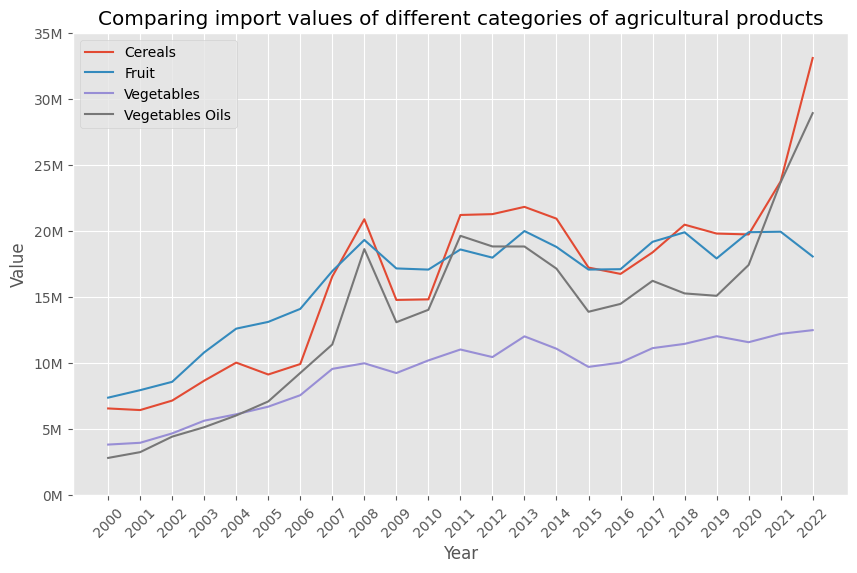

In [16]:
years = []

for index, row in df_export.drop_duplicates(subset=['Year']).iterrows():
    year = int(row['Year'])
    years.append(year)

years = sorted(years)


# Cereals (wheat, rice, corn, barley)    
def cereals():
    cereals_array = []
    
    for year in years:
        sum_cereals = round(df_import[((df_import['Year'] == year) & (df_import['Item'] == 'Wheat')) | 
                                      ((df_import['Year'] == year) & (df_import['Item'] == 'Rice')) | 
                                      ((df_import['Year'] == year) & (df_import['Item'] == 'Barley')) | 
                                      ((df_import['Year'] == year) & (df_import['Item'] == 'Maize (corn)'))]['Value'].sum(), 2)
        cereals_array.append(sum_cereals)
        
        
    plt.plot(years, cereals_array, label='Cereals')
    plt.xticks(years, rotation=45)
    



# Fruit (apple, banana, orange, grape)
def fruit():
    fruit_array = []
    
    for year in years:
        sum_fruit = round(df_import[((df_import['Year'] == year) & (df_import['Item'] == 'Apples')) |
                                    ((df_import['Year'] == year) & (df_import['Item'] == 'Bananas')) |
                                    ((df_import['Year'] == year) & (df_import['Item'] == 'Oranges')) |
                                    ((df_import['Year'] == year) & (df_import['Item'] == 'Grapes'))]['Value'].sum(), 2)
        fruit_array.append(sum_fruit)
           
        
    plt.plot(years, fruit_array, label='Fruit')
    plt.xticks(years, rotation=45)
  



# Vegetables (carrot, tomato, potato, lettuce)
def vegetables():
    vegetables_array = []
    
    for year in years:
        sum_vegetables = round(df_import[((df_import['Year'] == year) & (df_import['Item'] == 'Carrots and turnips')) |
                                         ((df_import['Year'] == year) & (df_import['Item'] == 'Tomatoes')) | 
                                         ((df_import['Year'] == year) & (df_import['Item'] == 'Potatoes')) |
                                         ((df_import['Year'] == year) & (df_import['Item'] == 'Sweet potatoes')) |
                                         ((df_import['Year'] == year) & (df_import['Item'] == 'Lettuce and chicory'))]['Value'].sum(), 2)
        vegetables_array.append(sum_vegetables)
      
    
    plt.plot(years, vegetables_array, label='Vegetables')
    plt.xticks(years, rotation=45)
    



# Vegetables oils (soya bean oil, rapeseed oil, sunflower-seed oil, palm oil)
def vegetables_oils():
    vegetables_oils_array = []
    
    for year in years:
        sum_vegetables_oils = round(df_import[((df_import['Year'] == year) & (df_import['Item'] == 'Soya bean oil')) |
                                              ((df_import['Year'] == year) & (df_import['Item'] == 'Rapeseed or canola oil, crude')) |
                                              ((df_import['Year'] == year) & (df_import['Item'] == 'Sunflower-seed oil, crude')) |
                                              ((df_import['Year'] == year) & (df_import['Item'] == 'Palm oil'))]['Value'].sum(), 2)
        vegetables_oils_array.append(sum_vegetables_oils)
    
    
    plt.plot(years, vegetables_oils_array, label='Vegetables Oils')
    plt.xticks(years, rotation=45)
   
    
    
    
plt.figure(figsize=(10, 6))
    
cereals()  
fruit()    
vegetables()
vegetables_oils()

plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
plt.title('Comparing import values of different categories of agricultural products')
plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()

plt.grid(True)
plt.show()


COMPARISON OF IMPORT VALUES FOR VARIOUS EUROPEAN COUNTRIES

['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Serbia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'UK']
[4485579, 52282928, 17989781, 202665807, 8500947, 14221825, 9793125, 31950707, 38806785, 4400414, 447145, 20649850, 220233756, 474186927, 33824126, 17500805, 1924150, 29295523, 228136416, 9471501, 16167476, 7258175, 2028343, 1498186, 335512109, 4144683, 36603672, 65718510, 57450061, 2775197, 32194085, 167738874, 6934155, 928887, 17215117, 13674354, 214887853, 51489860, 55952725, 24441506, 260226203]


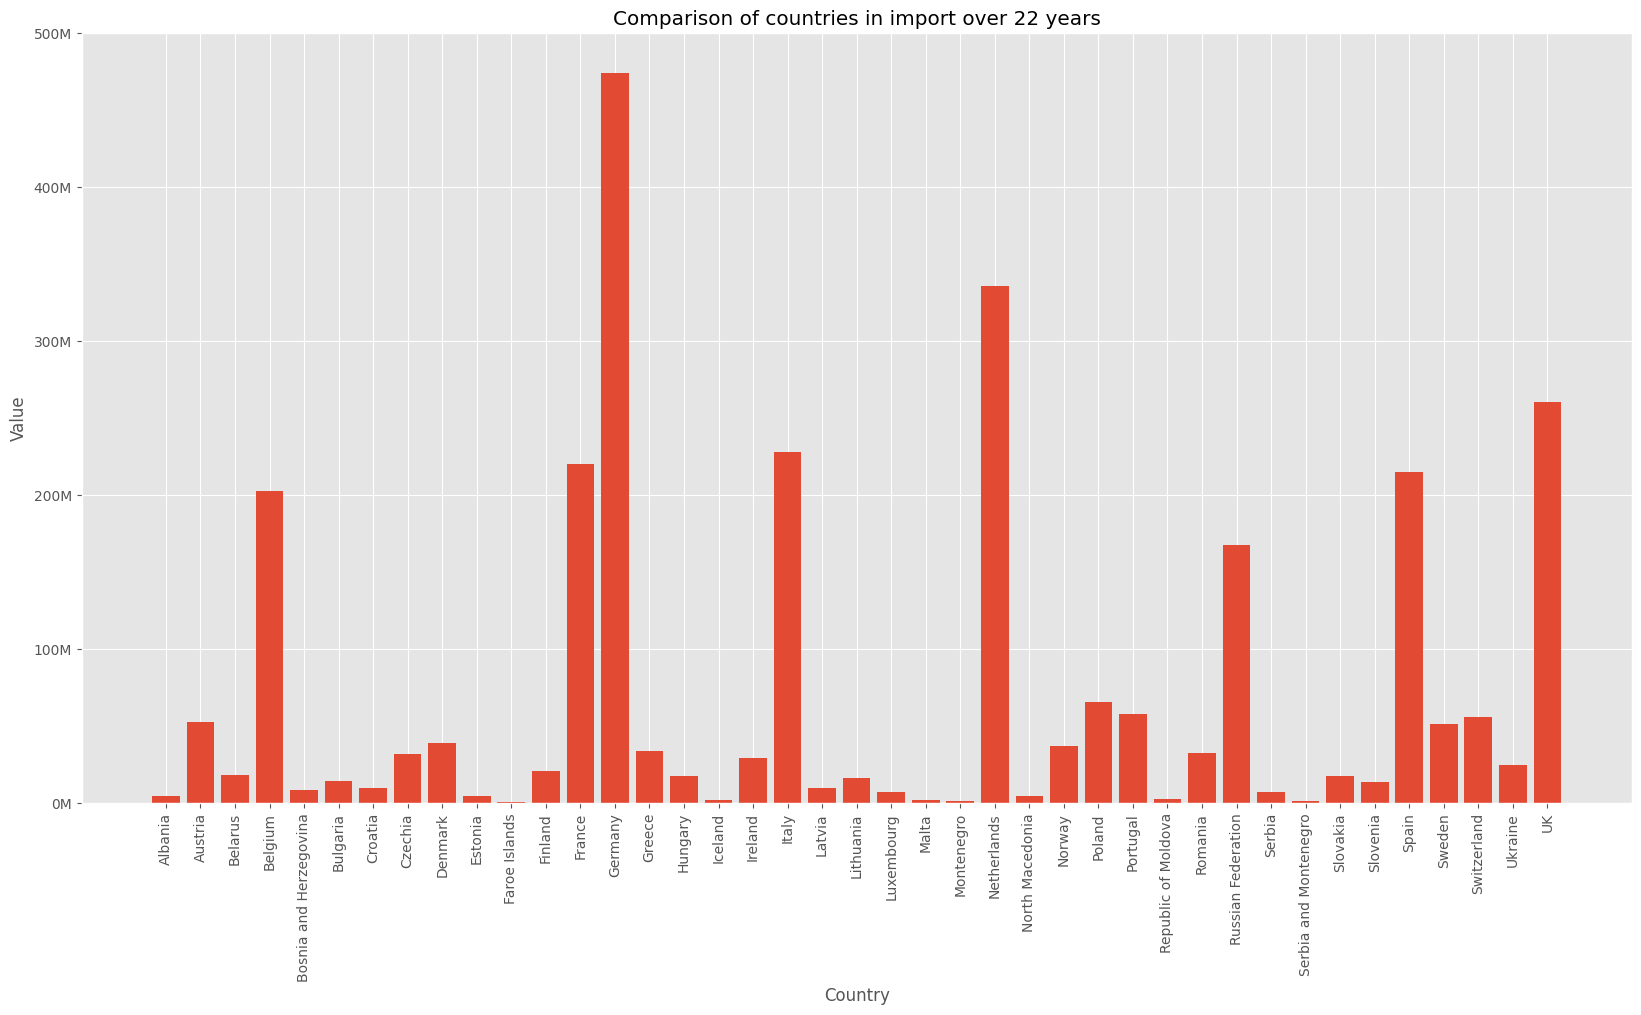

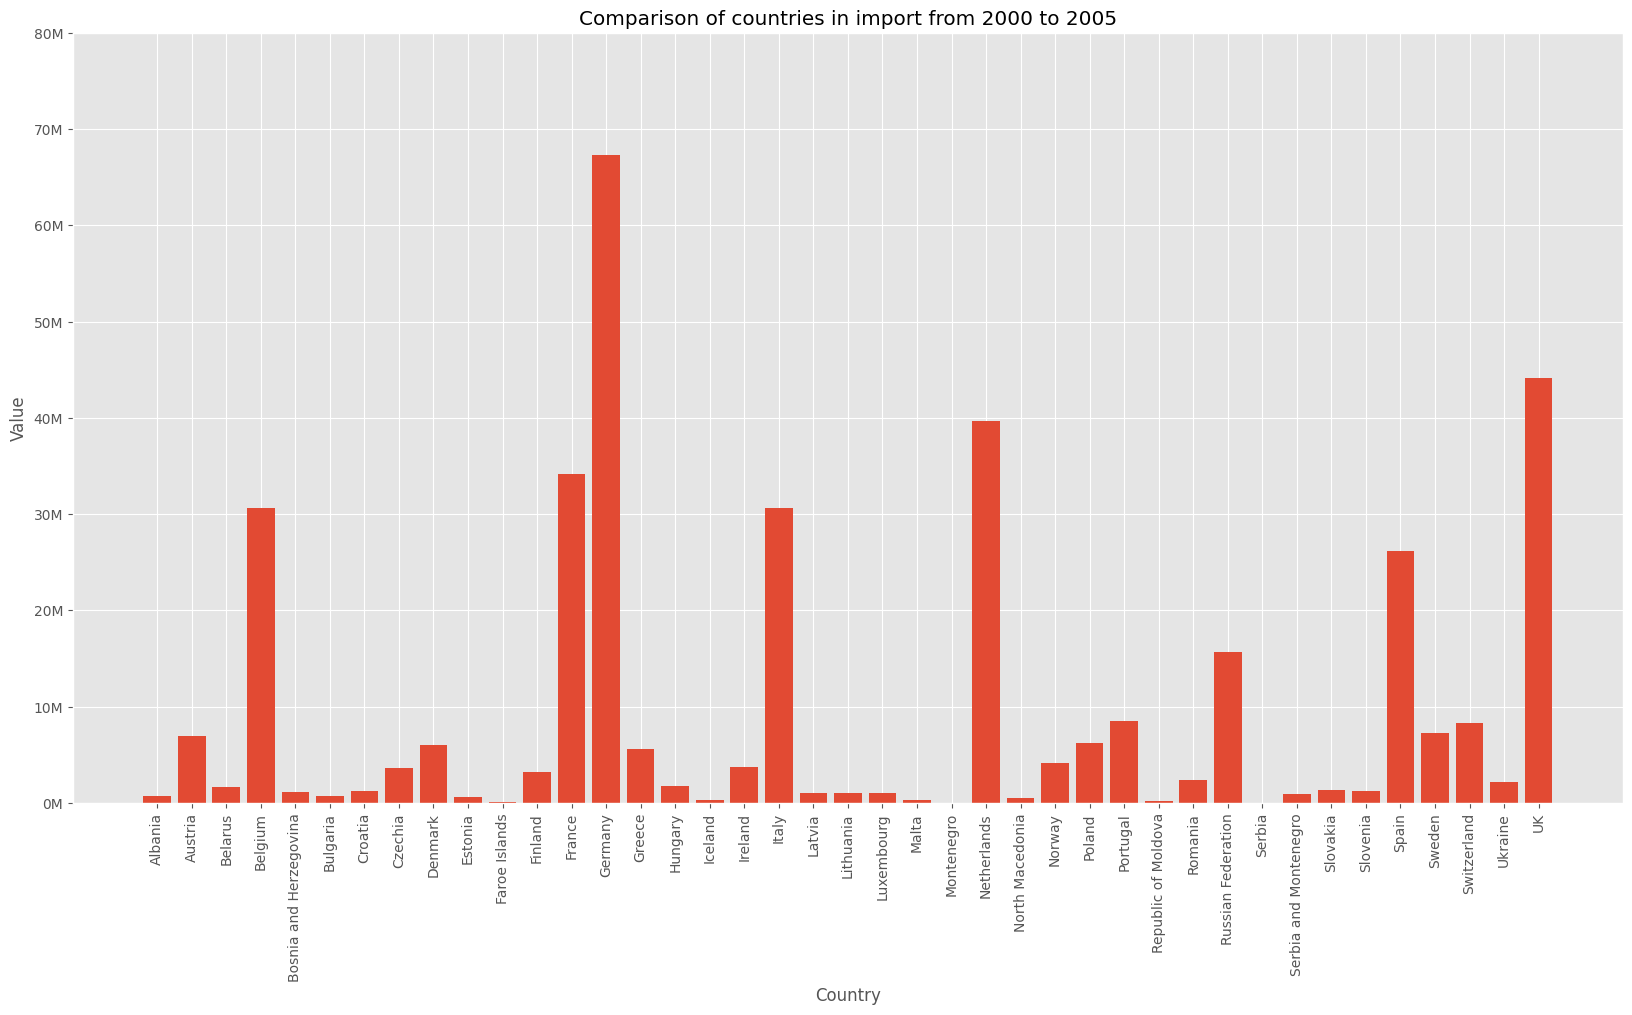

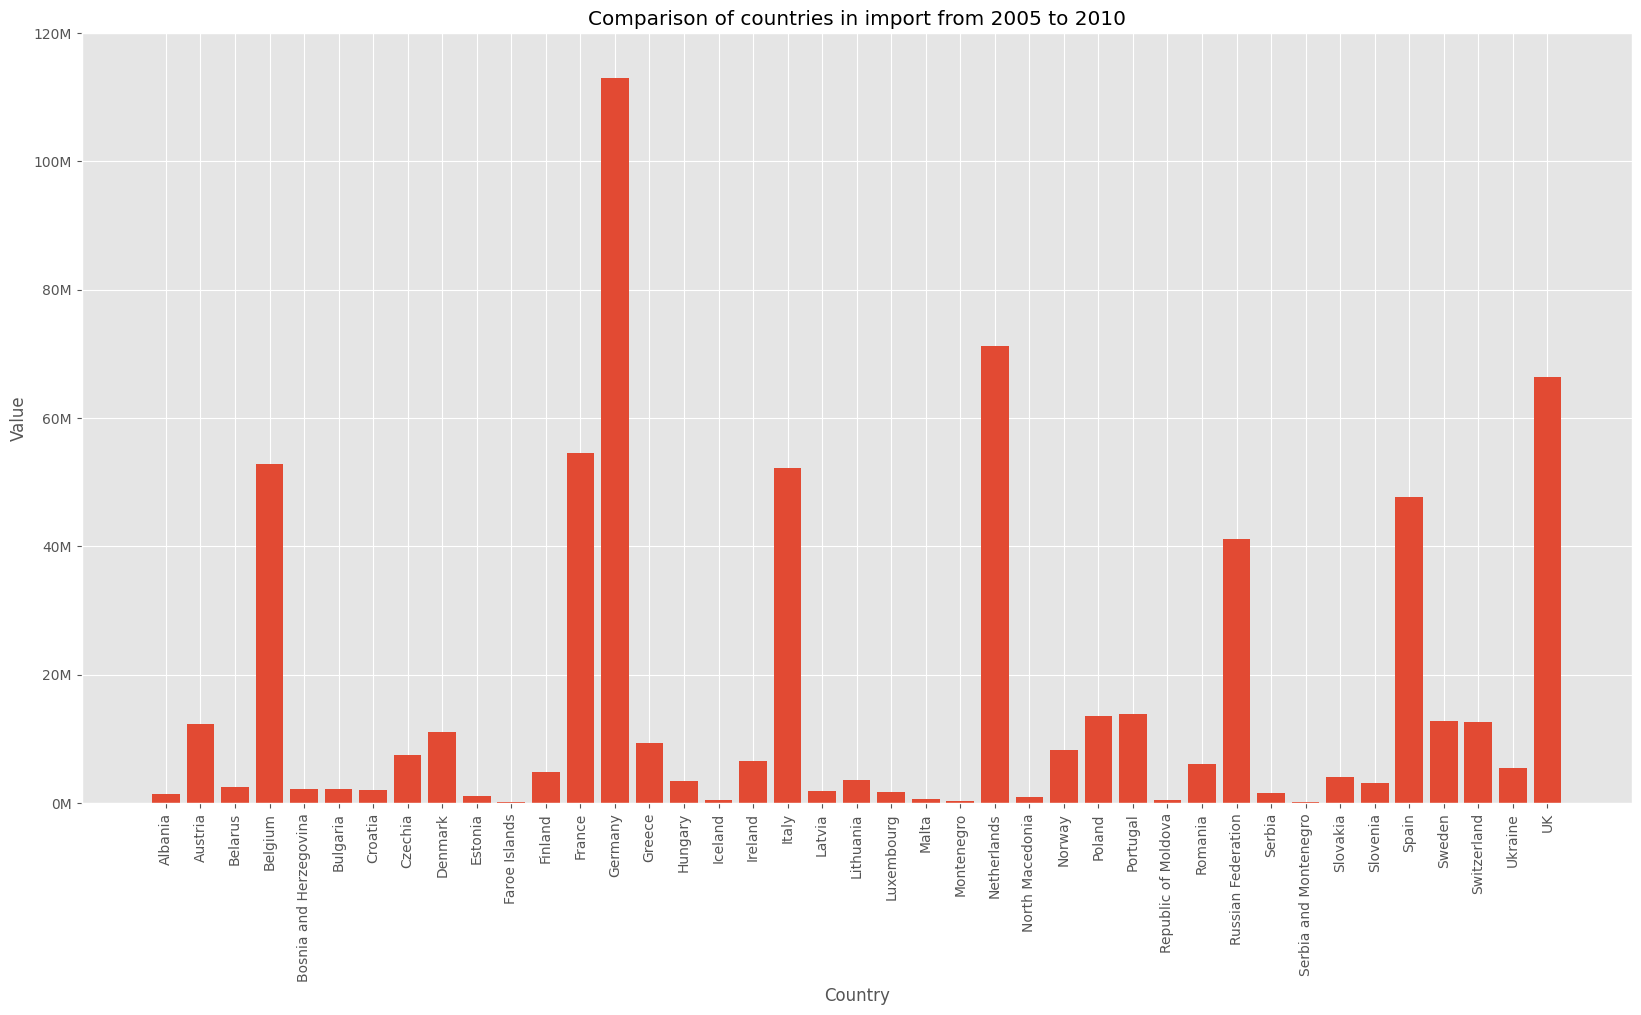

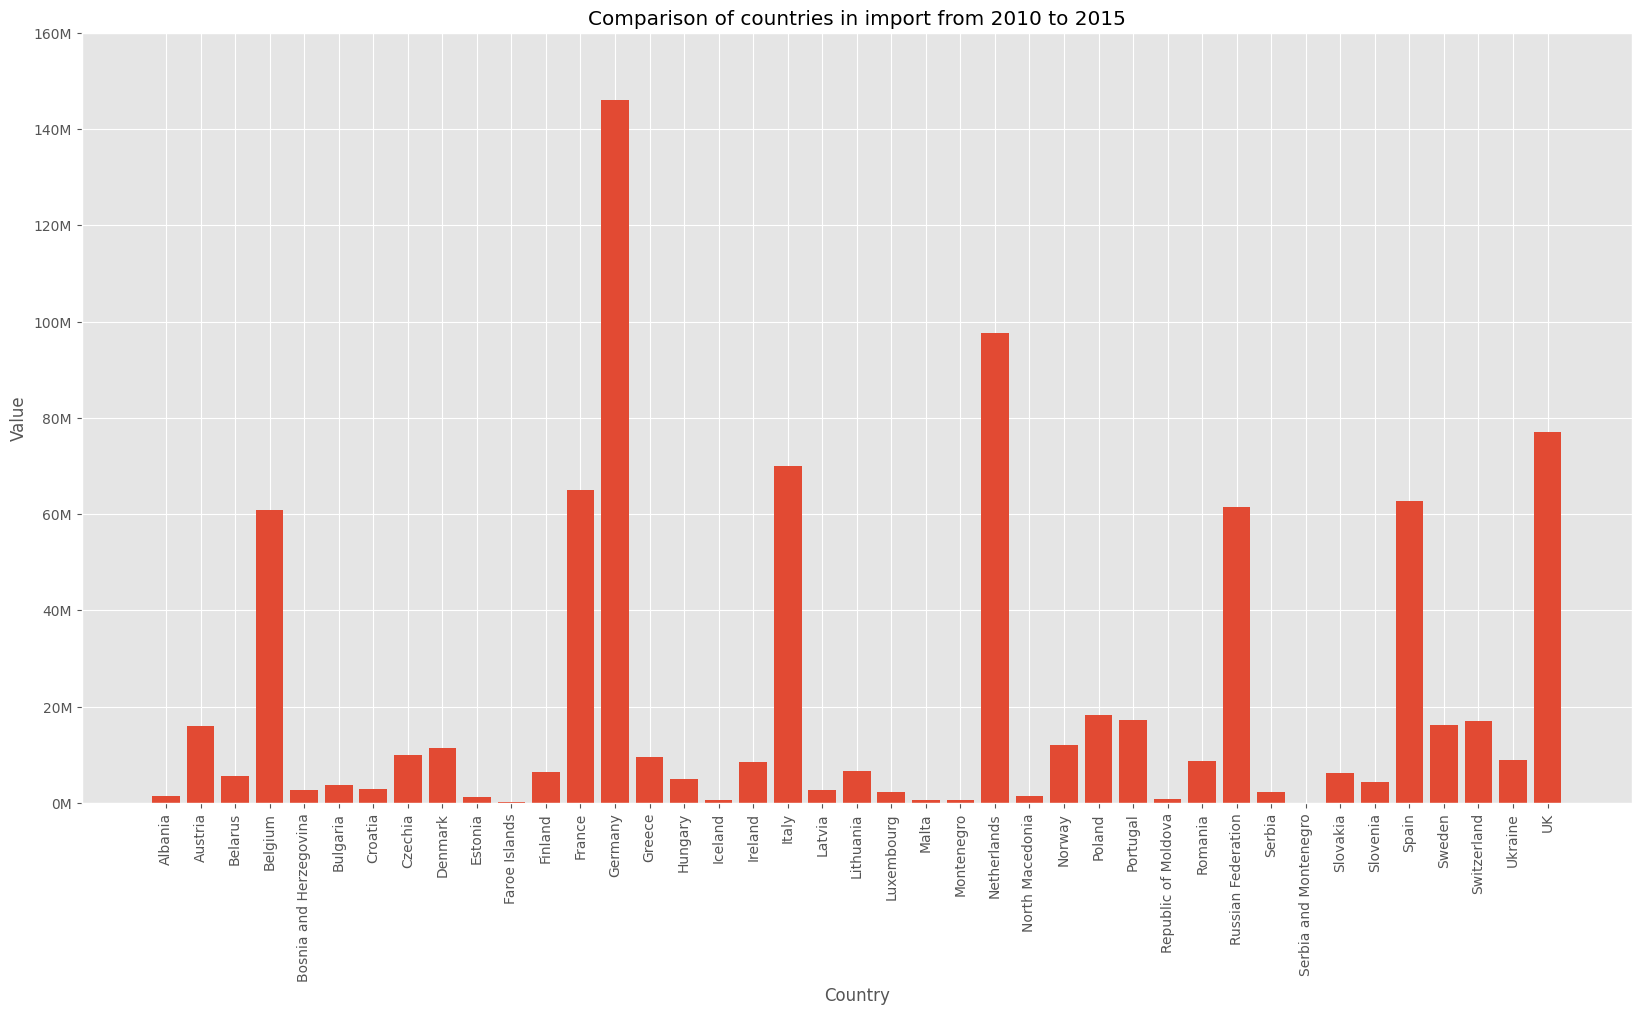

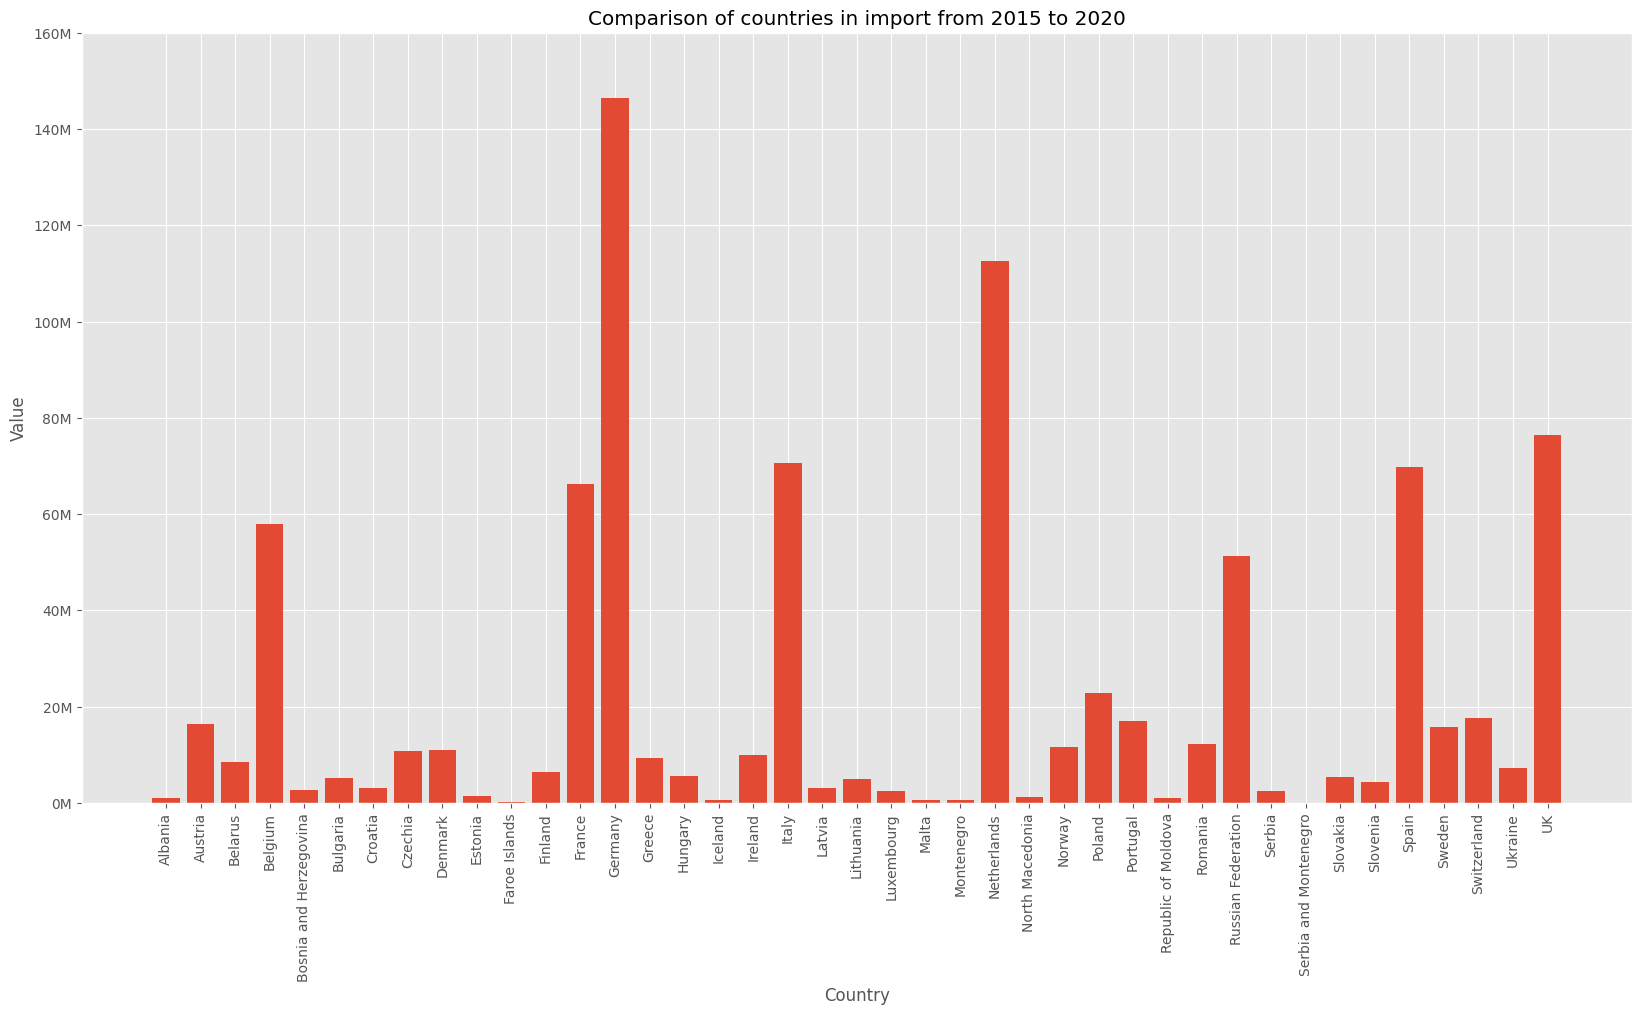

In [22]:
# Over the course of 22 years
def all_years():
    countries = []
    sum_array = []

    for index, row in df_import.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        sum_value = round(df_import[df_import['Area'] == country]['Value'].sum(), 2)
        sum_array.append(sum_value)
        

    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
   
            
    plt.figure(figsize=(20, 10))  
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in import over 22 years')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()
 

all_years()




# In the period 2000 - 2005
def analyze_2000_2005():
    years = [2000, 2001, 2002, 2003, 2004, 2005]
    countries = []
    sum_array = []
    
    for index, row in df_import.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_import[(df_import['Area'] == country) & (df_import['Year'] == year)]['Value'].sum() ,2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
        
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
          
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in import from 2000 to 2005')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()
      

analyze_2000_2005()




# In the period 2005 - 2010
def analyze_2005_2010():
    years = [2005, 2006, 2007, 2008, 2009, 2010]
    countries = []
    sum_array = []
    
    for index, row in df_import.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_import[(df_import['Area'] == country) & (df_import['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
        
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
        
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in import from 2005 to 2010')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2005_2010()




# In the period 2010 - 2015
def analyze_2010_2015():
    years = [2010, 2011, 2012, 2013, 2014, 2015]
    countries = []
    sum_array = []
    
    for index, row in df_import.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_import[(df_import['Area'] == country) & (df_import['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
    
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
    
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in import from 2010 to 2015')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2010_2015()




# In the period 2015 - 2020
def analyze_2015_2020():
    years = [2015, 2016, 2017, 2018, 2019, 2020]
    countries = []
    sum_array = []
    
    for index, row in df_import.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_import[(df_import['Area'] == country) & (df_import['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
    
    
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
                
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in import from 2015 to 2020')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2015_2020()



CHANGE IN AGRICULTURAL PRODUCT EXPORT VALUES OVER 22 YEARS IN EUROPE

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[31692829, 31802063, 36316506, 44971829, 48352739, 54035474, 58661710, 75755677, 97140209, 83872873, 88015753, 110656479, 117651466, 122587410, 120594575, 108673097, 109675607, 118437157, 125414372, 126737317, 137707604, 157617019, 168141995]


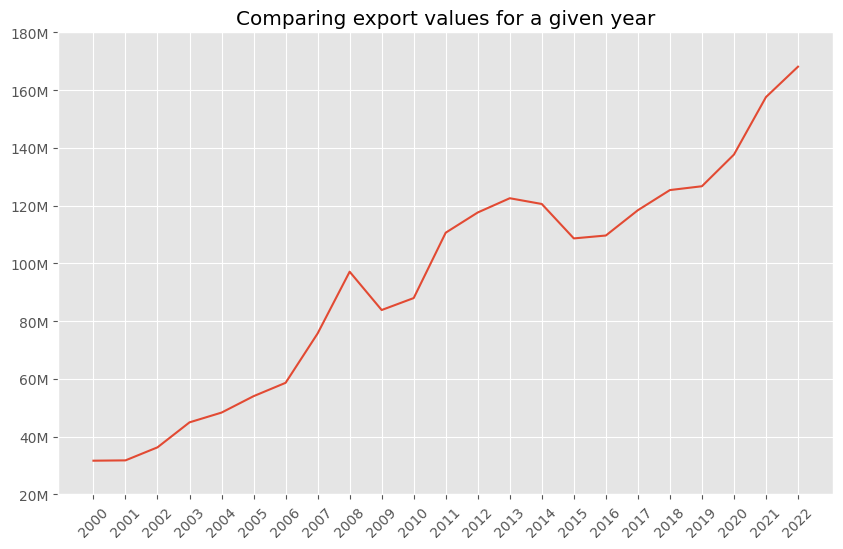

In [13]:
years = []
values = []

for index, row in df_export.drop_duplicates(subset=['Year']).iterrows():
    year = int(row['Year'])
    years.append(year)
    
years = sorted(years)   

for year in years: 
    sum_value = round(df_export[df_export['Year'] == year]['Value'].sum(), 2)
    values.append(sum_value)
    

plt.figure(figsize=(10, 6))
plt.plot(years, values)
plt.xticks(years, rotation=45)
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
plt.title('Comparing export values for a given year')
plt.style.use('ggplot')
plt.show()


COMPARING EXPORT VALUES OF DIFFERENT CATEGORIES OF AGRICULTURAL PRODUCTS

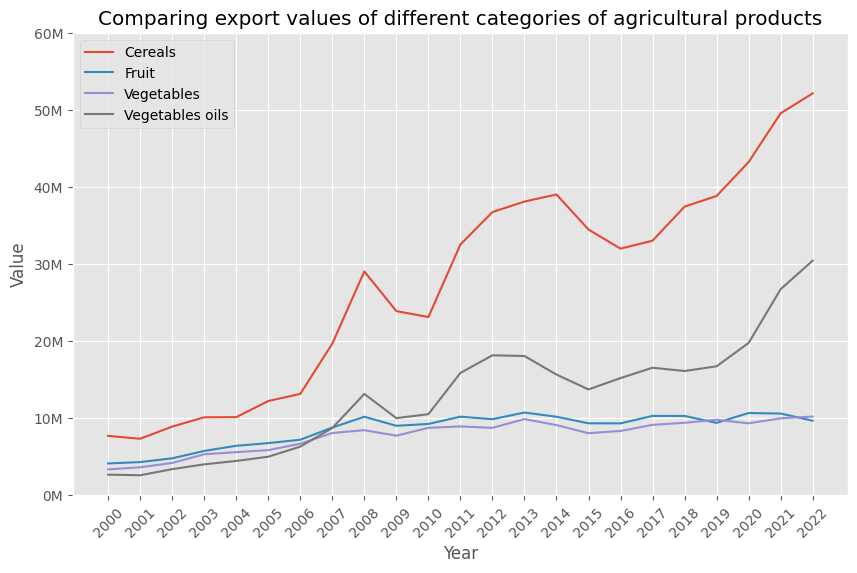

In [19]:
years = []

for index, row in df_export.drop_duplicates(subset=['Year']).iterrows():
    year = int(row['Year'])
    years.append(year)

years = sorted(years)


# Cereals (wheat, rice, corn, barley)
def cereals():
    cereals_array = []
    
    for year in years:       
        sum_value = round(df_export[((df_export['Year'] == year) & (df_export['Item'] == 'Wheat')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Rice')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Maize (corn)')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Barley'))]['Value'].sum(),2)
        
        cereals_array.append(sum_value)
        
    
    plt.plot(years, cereals_array, label='Cereals')
    plt.xticks(years, rotation=45)

    


# Fruit (apple, banana, orange, grape)
def fruit():
    fruit_array = []
    
    for year in years:      
        sum_value = round(df_export[((df_export['Year'] == year) & (df_export['Item'] == 'Apples')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Bananas')) | 
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Oranges')) | 
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Grapes'))]['Value'].sum(),2)
        
        fruit_array.append(sum_value)
        
        
    plt.plot(years, fruit_array, label='Fruit')
    plt.xticks(years, rotation=45)
        



# Vegetables (carrot, tomato, potato, lettuce)
def vegetables():
    vegetables_array = []
    
    for year in years:     
        sum_value = round(df_export[((df_export['Year'] == year) & (df_export['Item'] == 'Carrots and turnips')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Tomatoes')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Potatoes')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Lettuce and chicory'))]['Value'].sum(),2)

        vegetables_array.append(sum_value)
        
 
    plt.plot(years, vegetables_array, label='Vegetables')
    plt.xticks(years, rotation=45)




# Vegetables oils (soya bean oil, rapeseed oil, sunflower-seed oil, palm oil)
def vegetables_oils():
    vegetables_oils_array = []
    
    for year in years:       
        sum_value = round(df_export[((df_export['Year'] == year) & (df_export['Item'] == 'Soya bean oil')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Rapeseed or canola oil, crude')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Sunflower-seed oil, crude')) |
                                    ((df_export['Year'] == year) & (df_export['Item'] == 'Palm oil'))]['Value'].sum(),2)

        vegetables_oils_array.append(sum_value)
        
    
    plt.plot(years, vegetables_oils_array, label='Vegetables oils')
    plt.xticks(years, rotation=45)




plt.figure(figsize=(10, 6))
    
cereals()  
fruit()    
vegetables()
vegetables_oils()

plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
plt.title('Comparing export values of different categories of agricultural products')
plt.xlabel('Year')
plt.ylabel('Value')

plt.legend()

plt.grid(True)
plt.show()



COMPARISON OF EXPORT VALUES FOR VARIOUS EUROPEAN COUNTRIES

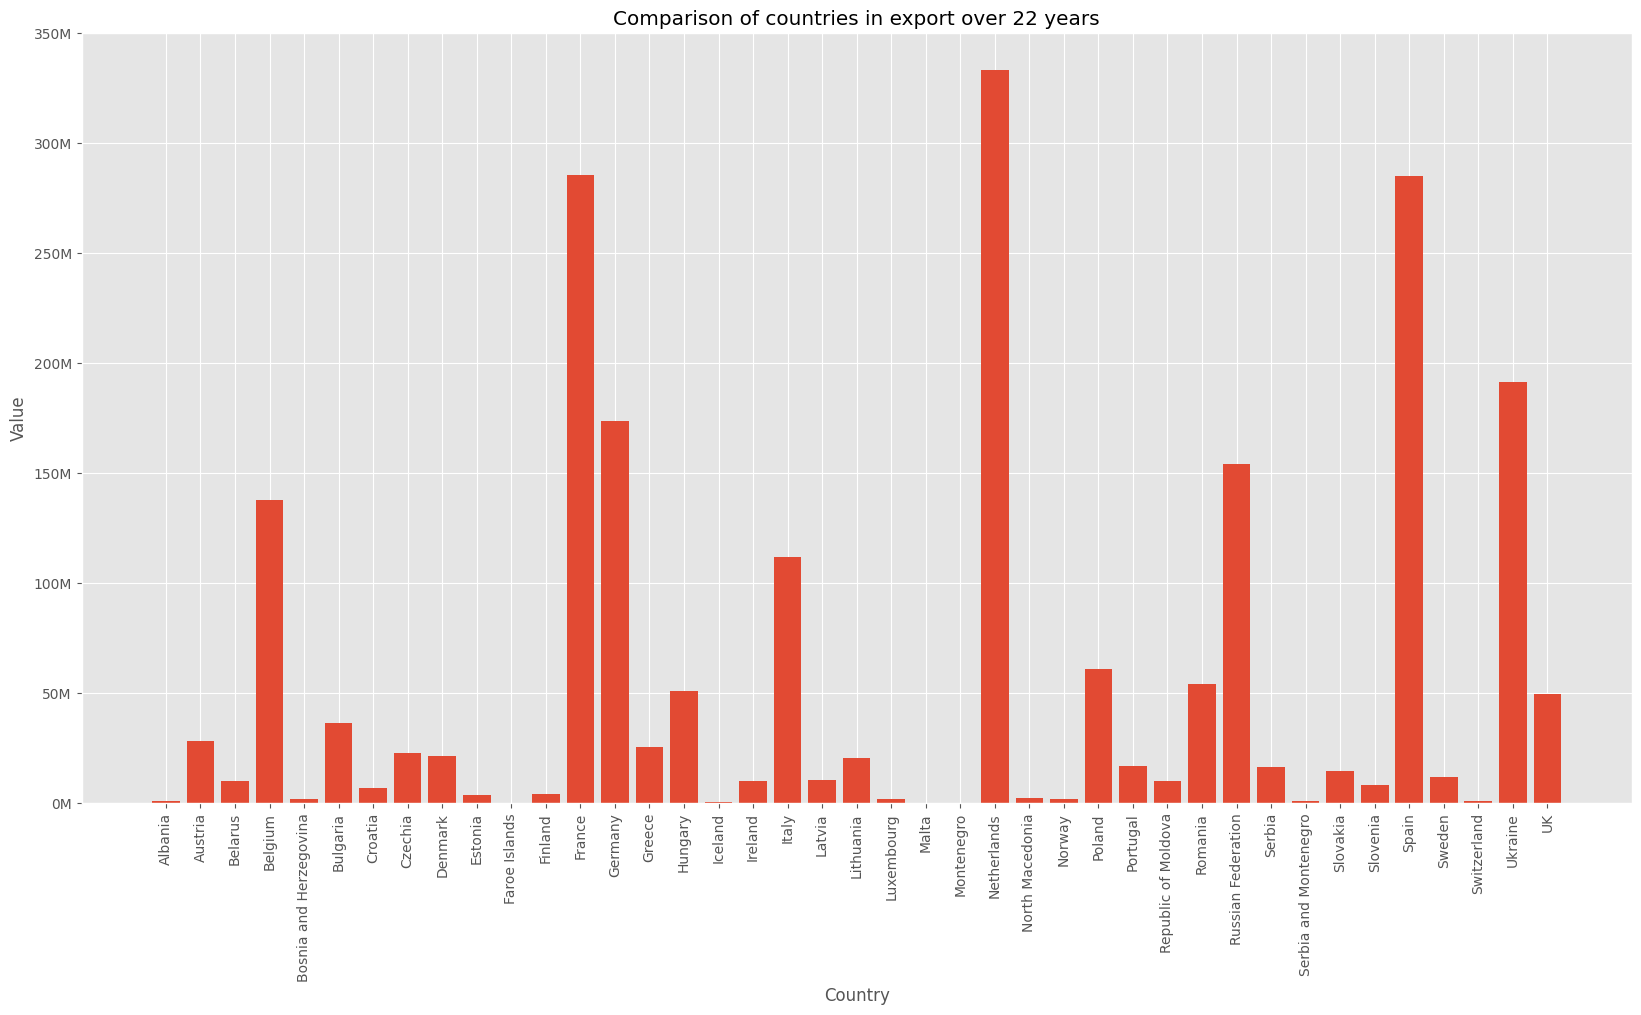

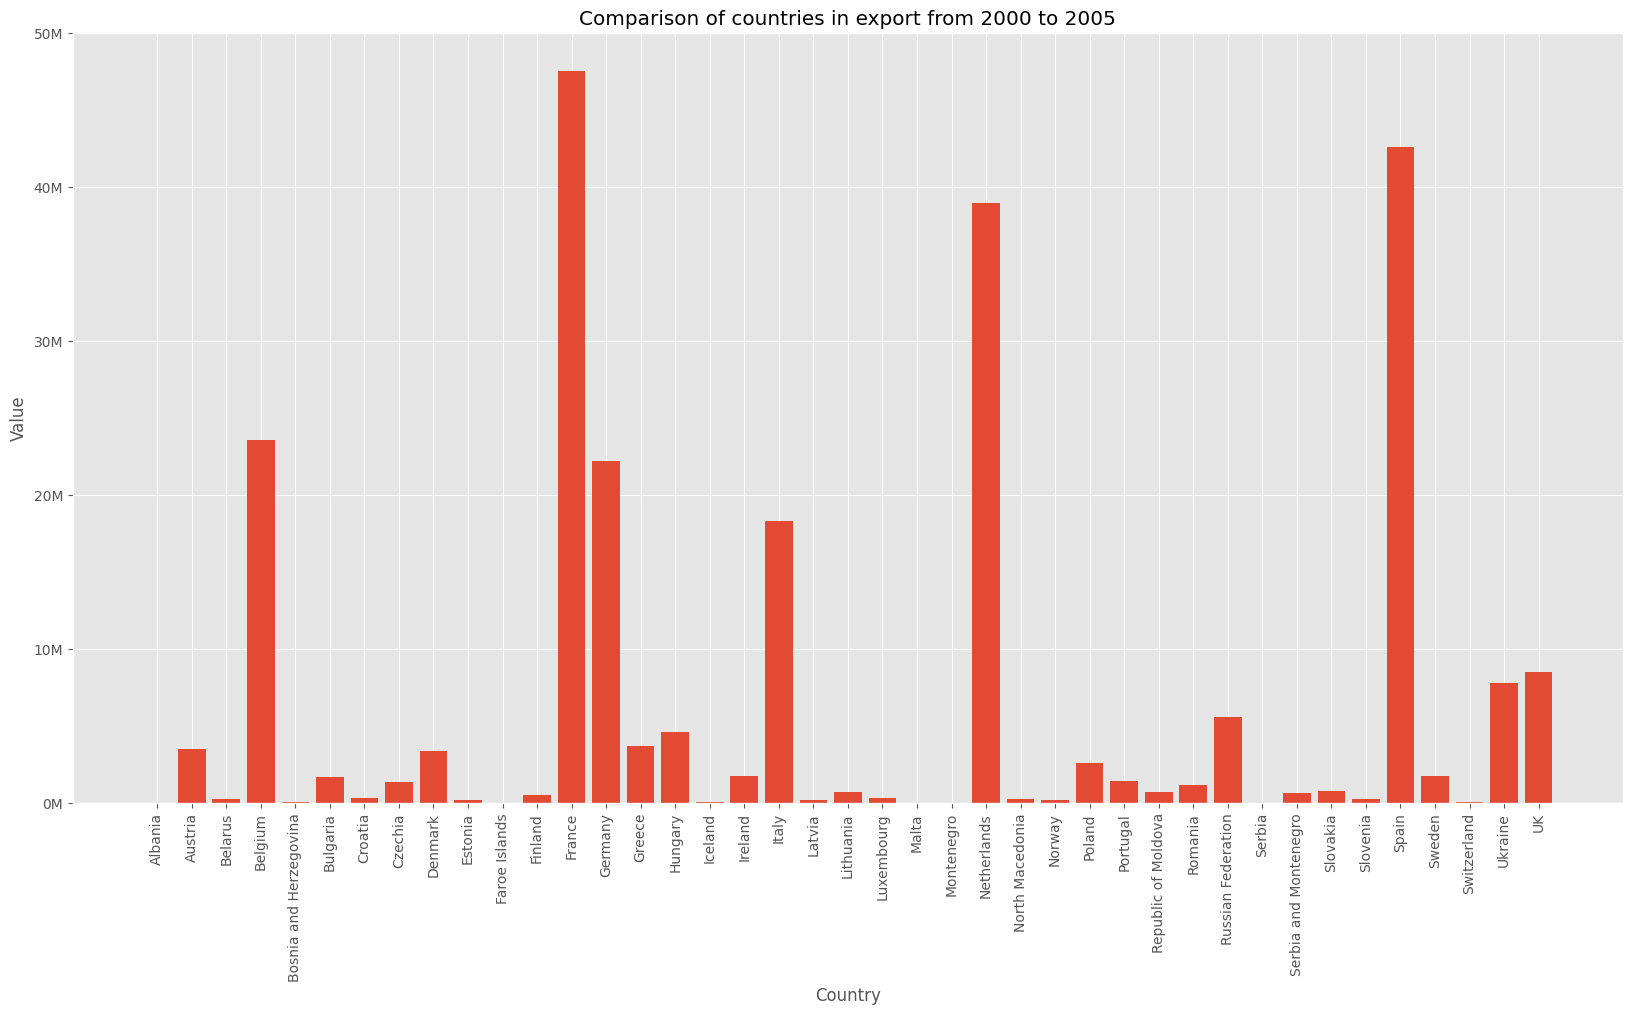

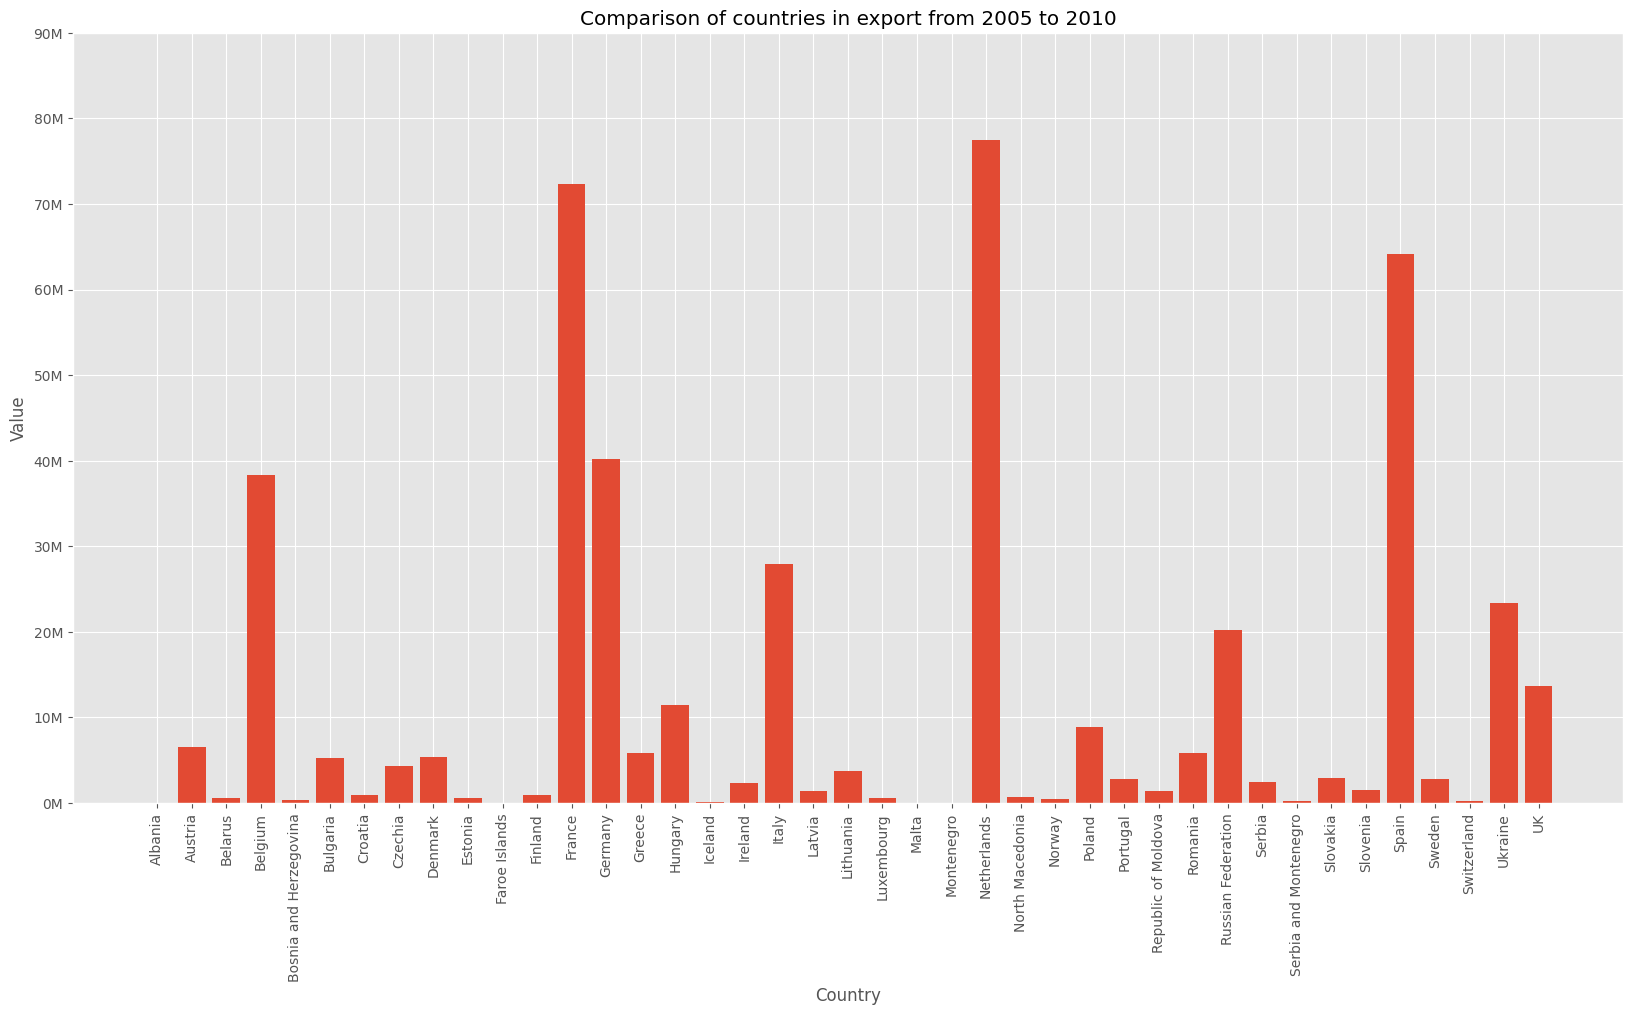

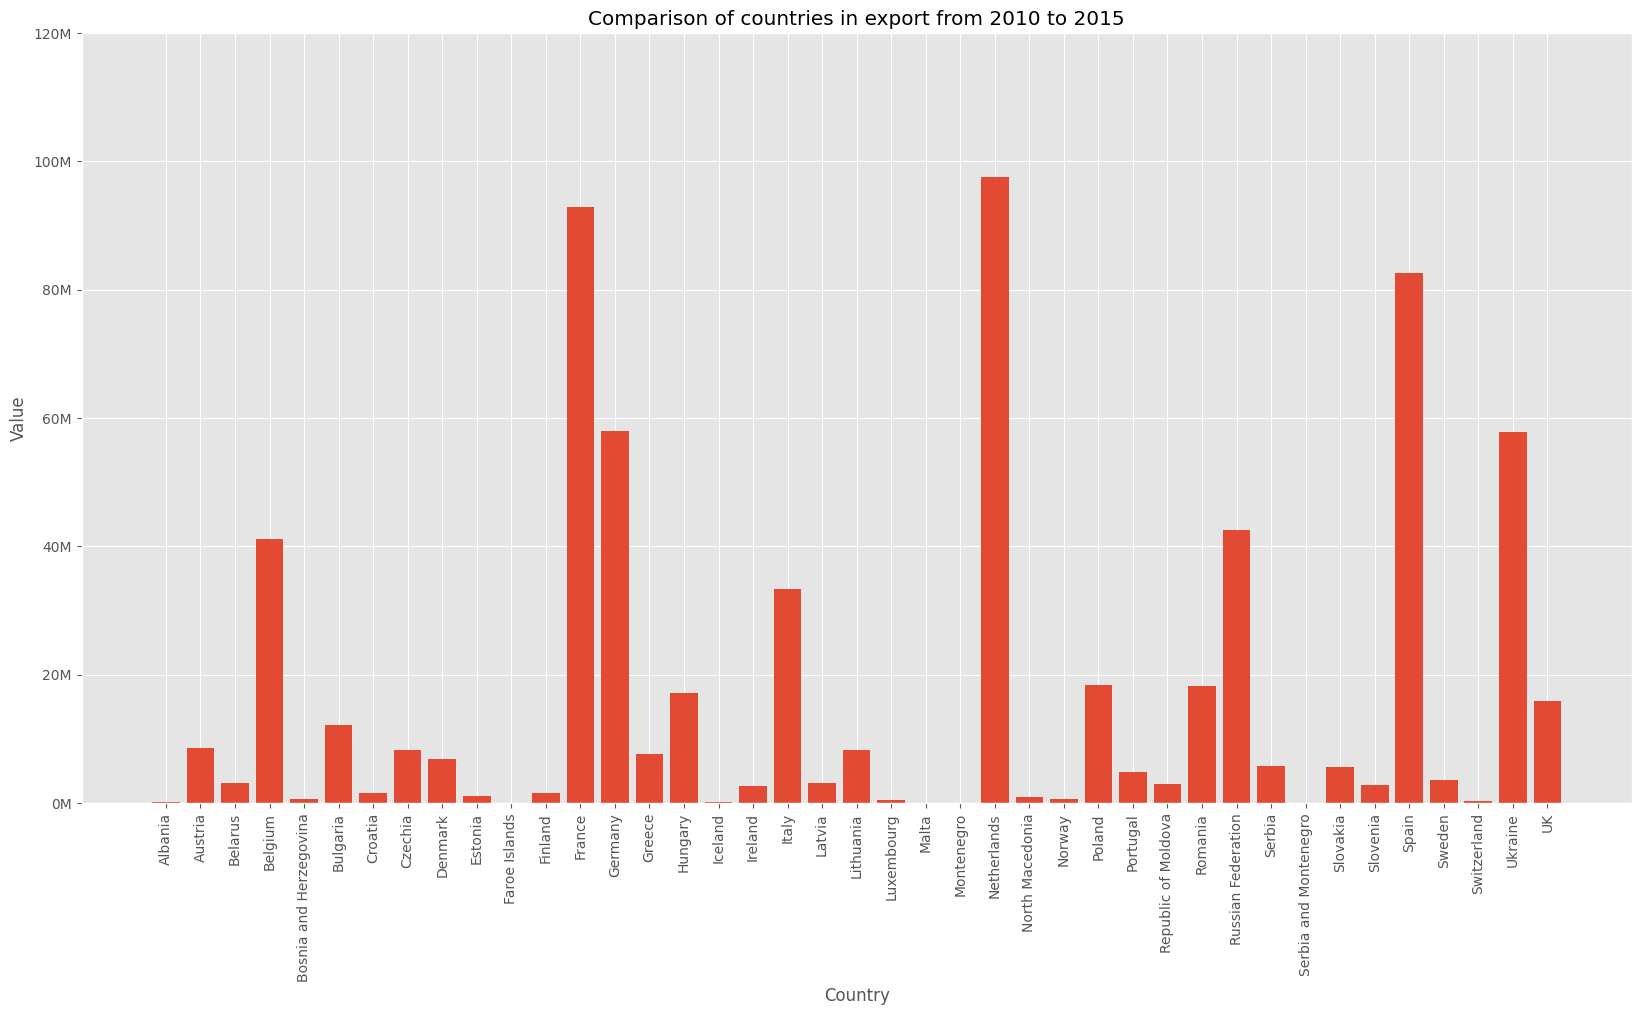

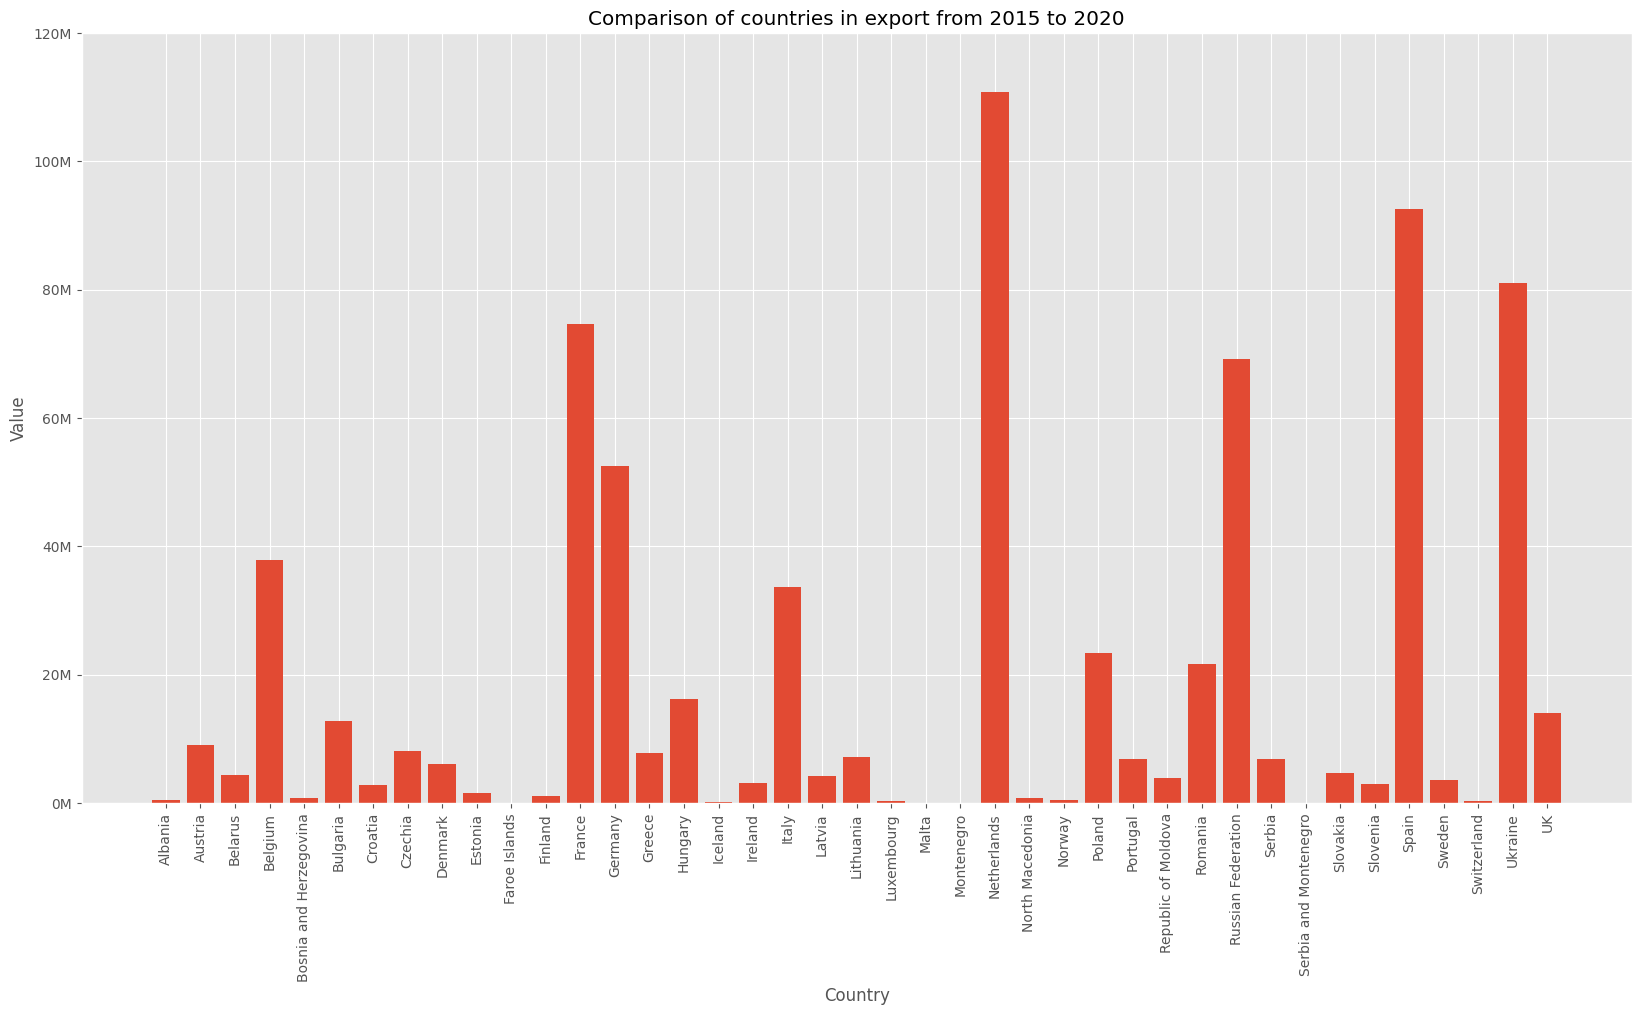

In [13]:
def all_years():
    countries = []
    values = []
    
    for index, row in df_export.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        sum_value = round(df_export[df_export['Area'] == country]['Value'].sum(),2) 
        values.append(sum_value)
        
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
            
    
        
    plt.figure(figsize=(20, 10))  
    plt.bar(countries, values)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in export over 22 years')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation = 90)
    plt.style.use('ggplot')
    
    plt.show()
    
all_years()



# In the period 2000 - 2005
def analyze_2000_2005():
    years = [2000, 2001, 2002, 2003, 2004, 2005]
    countries = []
    sum_array = []
    
    for index, row in df_export.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_export[(df_export['Area'] == country) & (df_export['Year'] == year)]['Value'].sum() ,2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
        
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
          
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in export from 2000 to 2005')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.style.use('ggplot')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()
      

analyze_2000_2005()




# In the period 2005 - 2010
def analyze_2005_2010():
    years = [2005, 2006, 2007, 2008, 2009, 2010]
    countries = []
    sum_array = []
    
    for index, row in df_export.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_export[(df_export['Area'] == country) & (df_export['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
        
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
        
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in export from 2005 to 2010')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2005_2010()




# In the period 2010 - 2015
def analyze_2010_2015():
    years = [2010, 2011, 2012, 2013, 2014, 2015]
    countries = []
    sum_array = []
    
    for index, row in df_export.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_export[(df_export['Area'] == country) & (df_export['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
    
        
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
    
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in export from 2010 to 2015')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2010_2015()




# In the period 2015 - 2020
def analyze_2015_2020():
    years = [2015, 2016, 2017, 2018, 2019, 2020]
    countries = []
    sum_array = []
    
    for index, row in df_export.drop_duplicates(subset=['Area']).iterrows():
        country = row['Area']
        countries.append(country)
        
        country_sum = 0
        
        for year in years:
            sum_value = round(df_export[(df_export['Area'] == country) & (df_export['Year'] == year)]['Value'].sum(),2)
            country_sum += sum_value
            
        sum_array.append(country_sum)
    
    
    for i in range(len(countries)):
        if countries[i] == 'Netherlands (Kingdom of the)':
            countries[i] = 'Netherlands'
        if countries[i] == 'United Kingdom of Great Britain and Northern Ireland':
            countries[i] = 'UK'
                
    
    plt.figure(figsize=(20,10))
    plt.bar(countries, sum_array)
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title('Comparison of countries in export from 2015 to 2020')
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.style.use('ggplot')

    plt.show()


analyze_2015_2020()

TOP 5 AGRICULTURAL PRODUCTS IN IMPORT & EXPORT FOR A GIVEN COUNTRY

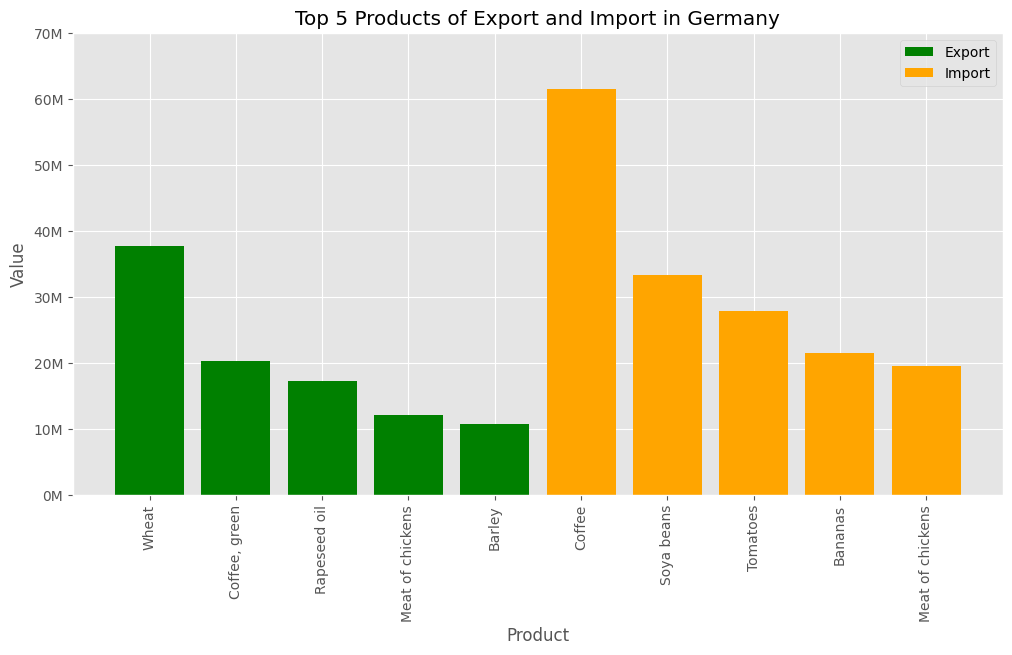

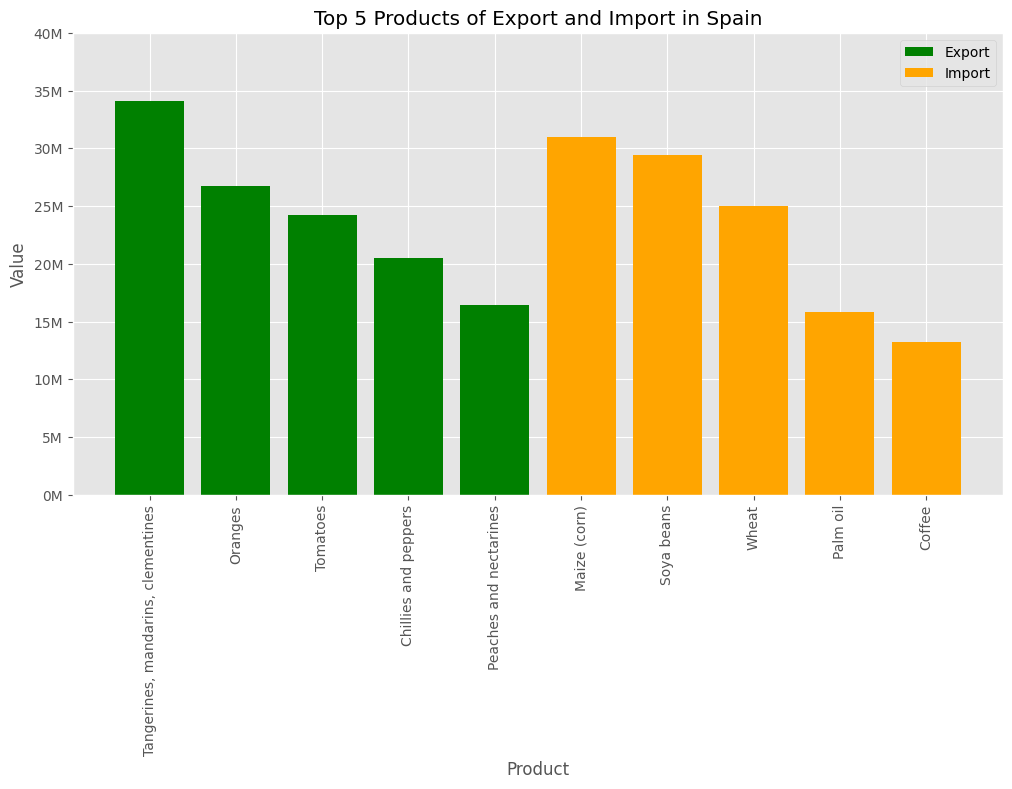

In [4]:
def top_products(country):
    value_export = {}
    value_import = {}
    
    for index, row in df_export.drop_duplicates(subset=['Item']).iterrows():
        product = row['Item']
        sum_value_export = round(df_export[(df_export['Item'] == product) & (df_export['Area'] == country)]['Value'].sum(), 2)
        value_export[product] = sum_value_export
    
    
    for index, row in df_import.drop_duplicates(subset=['Item']).iterrows():
        product = row['Item']
        sum_value_import = round(df_import[(df_import['Item'] == product) & (df_import['Area'] == country)]['Value'].sum(), 2)
        value_import[product] = sum_value_import


    sorted_export = dict(sorted(value_export.items(), key = lambda item: item[1], reverse=True))
    sorted_import = dict(sorted(value_import.items(), key = lambda item: item[1], reverse=True))
    
    
    top_5_export = list(sorted_export.items())[:5]
    top_5_import = list(sorted_import.items())[:5]
    
    
    product_export = [item[0] for item in top_5_export]
    value_export = [item[1] for item in top_5_export]
    
    
    product_import = [item[0] for item in top_5_import]
    value_import = [item[1] for item in top_5_import]
    
    
    for i in range(len(product_import)):
        if product_import[i] == 'Coffee, green':
            product_import[i] = 'Coffee'
        if product_import[i] == 'Meat of chickens, fresh or chilled':
            product_import[i] = 'Meat of chickens'
    
     
    for i in range(len(product_export)):
        if product_export[i] == 'Rapeseed or canola oil, crude':
            product_export[i] = 'Rapeseed oil'
        if product_export[i] == 'Meat of chickens, fresh or chilled':
            product_export[i] = 'Meat of chickens'
        if product_export[i] == 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)':
            product_export[i] = 'Chillies and peppers'
        if product_import[i] == 'Meat of sheep, fresh or chilled':
            product_import[i] = 'Meat of sheep'  

    
                  
    x_import = [x + 5 for x in range(len(product_import))]
    
     
    plt.figure(figsize=(12, 6))
    
    plt.bar(range(len(product_export)), value_export, label='Export', color='green')
    plt.bar(x_import, value_import, label='Import', color='orange')
    
    plt.xticks(range(len(product_export) + len(product_import)), product_export + product_import, rotation=90)
    
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.xlabel('Product')
    plt.ylabel('Value')
    plt.title(f'Top 5 Products of Export and Import in {country}')
    plt.style.use('ggplot')

    
    
    plt.legend()
    
    plt.show()
    
top_products('Germany')    
top_products('Spain')


COMPARISON OF IMPORT & EXPORT OF A GIVEN AGRICULTURAL PRODUCT

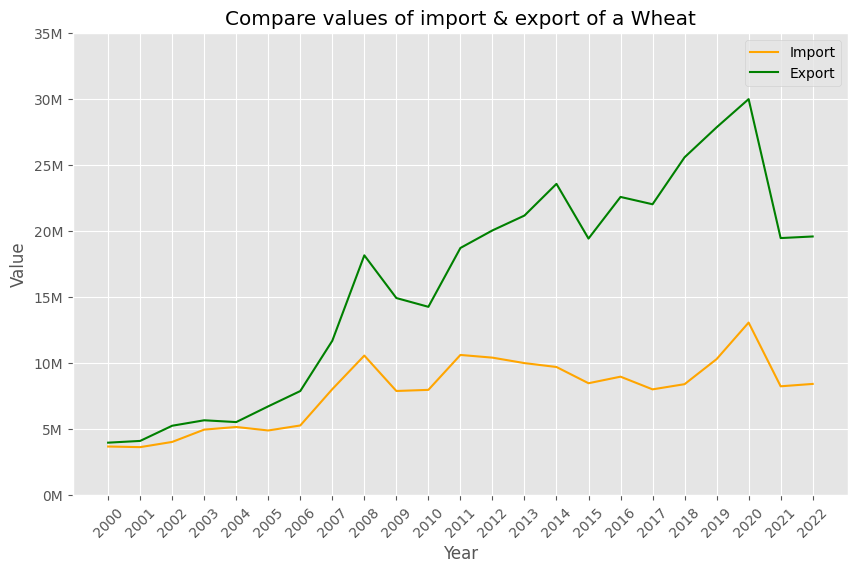

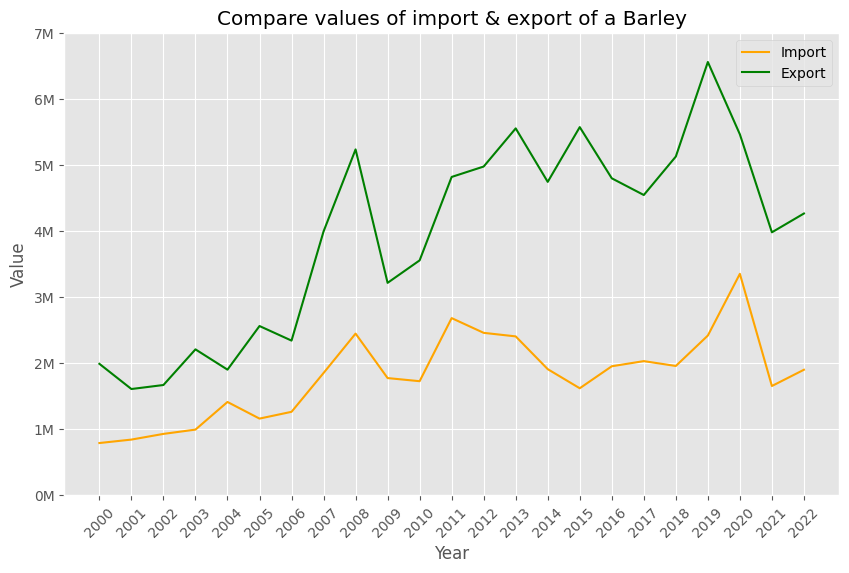

In [14]:
def agri_product(product):
    years = []
    values_import = []
    values_export = []
    
    for index, row in df_import.drop_duplicates(subset=['Year']).iterrows():
        year = int(row['Year'])
        years.append(year)
        
        sum_value_import = round(df_import[(df_import['Year'] == year) & (df_import['Item'] == product)]['Value'].sum(), 2)
        values_import.append(sum_value_import)
        
        sum_value_export = round(df_export[(df_export['Year'] == year) & (df_export['Item'] == product)]['Value'].sum(), 2)
        values_export.append(sum_value_export)
        
    years = sorted(years)
    

    plt.figure(figsize=(10, 6))
    
    plt.plot(years, values_import, label='Import', color='orange')
    plt.plot(years, values_export, label='Export', color='green')
    
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.gca().set_yticks(plt.gca().get_yticks())
    plt.gca().set_yticklabels(['{:.0f}M'.format(x/1e6) for x in plt.gca().get_yticks()])
    plt.title(f'Compare values of import & export of a {product}')
    plt.xticks(years, rotation=45)
    
    plt.style.use('ggplot')
    plt.legend()
    plt.grid(True)
    
    plt.show()
    
    
agri_product('Wheat')
agri_product('Barley')

PERCENTAGE CHANGE IN IMPORT VALUE COMPARED TO THE PREVIOUS YEAR

In [14]:
percent_array = []

for i in range(1, len(years)):
    sum_value_current = round(df_import[df_import['Year'] == years[i]]['Value'].sum(), 2)
    sum_value_previous = round(df_import[df_import['Year'] == years[i - 1]]['Value'].sum(), 2)
    
    percent_change = round(((sum_value_current - sum_value_previous) / sum_value_previous) * 100, 2)
    percent_array.append(percent_change)
    
print(years[1:])
print(percent_array)
    

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[2.31, 8.86, 23.1, 14.01, 6.96, 9.45, 27.26, 24.19, -17.35, 5.85, 22.29, -2.1, 4.14, -1.31, -10.74, 0.37, 9.63, 4.08, -3.5, 6.95, 12.27, 13.26]


PERCENTAGE CHANGE IN EXPORT VALUE COMPARED TO THE PREVIOUS YEAR

In [15]:
percent_array = []

for i in range(1, len(years)):
    sum_value_current = round(df_export[df_export['Year'] == years[i]]['Value'].sum(), 2)
    sum_value_previous = round(df_export[df_export['Year'] == years[i - 1]]['Value'].sum(), 2)
    
    percent_change = round(((sum_value_current - sum_value_previous) / sum_value_previous) * 100, 2)
    percent_array.append(percent_change)
    
print(years[1:])
print(percent_array)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[0.34, 14.2, 23.83, 7.52, 11.75, 8.56, 29.14, 28.23, -13.66, 4.94, 25.72, 6.32, 4.2, -1.63, -9.89, 0.92, 7.99, 5.89, 1.05, 8.66, 14.46, 6.68]
